# Fashion MNIST Neural Network
Anthony Guarino

In [29]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

**Inputs:**

In [30]:
hidden_layers = 3
units = 64
batch_size = 512
epochs = 12

In [33]:
fmnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fmnist.load_data()

train_images = train_images.reshape(60000, 784) / 255.0
test_images = test_images.reshape(10000, 784) / 255.0

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

model = Sequential()
model.add(Dense(units=units, activation='relu', input_shape=(784,)))

for _ in range(hidden_layers):
    model.add(Dense(units=units, activation='relu'))

model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(
    train_images, train_labels,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(test_images, test_labels),
    verbose=1
)

s = model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/12
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.5799 - loss: 1.2194 - val_accuracy: 0.8130 - val_loss: 0.5203
Epoch 2/12
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8314 - loss: 0.4682 - val_accuracy: 0.8307 - val_loss: 0.4583
Epoch 3/12
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8491 - loss: 0.4221 - val_accuracy: 0.8441 - val_loss: 0.4289
Epoch 4/12
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8634 - loss: 0.3874 - val_accuracy: 0.8516 - val_loss: 0.4109
Epoch 5/12
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8699 - loss: 0.3666 - val_accuracy: 0.8512 - val_loss: 0.4153
Epoch 6/12
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8693 - loss: 0.3574 - val_accuracy: 0.8614 - val_loss: 0.3842
Epoch 7/12
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8776 - loss: 0.3344 - val_accuracy: 0.8673 - val_loss: 0.3726
Epoch 8/12
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8811 - loss: 0.3247 - val_accuracy: 

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 190,112 (742.63 KB)

 Trainable params: 63,370 (247.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 126,742 (495.09 KB)

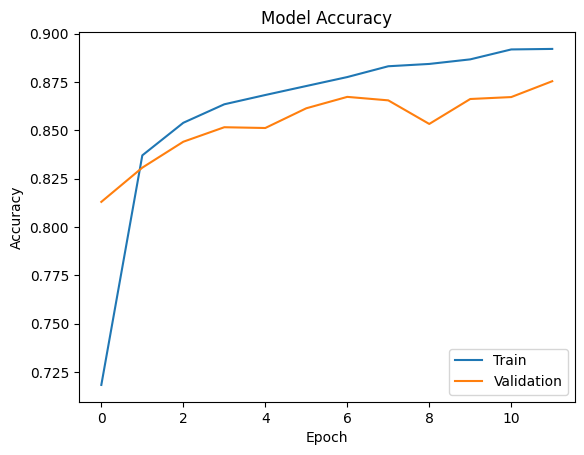

Final Training Accuracy: 0.8921
Final Validation Accuracy: 0.8754

Hyperparameters:
Hidden Layers: 3
Units per Layer: 64
Batch Size: 512
Epochs: 12


In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")

print(f"\nHyperparameters:")
print(f"Hidden Layers: {hidden_layers}")
print(f"Units per Layer: {units}")
print(f"Batch Size: {batch_size}")
print(f"Epochs: {epochs}")